In [1]:
import pandas as pd

In [2]:
file_path_dict = "../data/audio_features_data_dictionary.csv"
dict_df = pd.read_csv(file_path_dict)
dict_df

,Feature,Meaning,Typical Range,Notes
0,Danceability,"How suitable a track is for dancing, based on ...",0.0 to 1.0,Higher = easier to dance to
1,Energy,Intensity and activity of a track. High energy...,0.0 to 1.0,"Higher = louder, faster, more intense"
2,Key,Estimated musical key (pitch center) of the song.,0 to 11,"0 = C, 1 = C#/Db, ..., 11 = B"
3,Loudness,Overall loudness measured in decibels (dB).,-60 to 0 dB,Closer to 0 = louder
4,Mode,Major or minor scale mode of the song.,0 or 1,"0 = Minor, 1 = Major"
5,Speechiness,Measure of spoken words in the track.,0.0 to 1.0,"Higher = more speech-like (e.g., rap)"
6,Acousticness,Confidence the track is acoustic.,0.0 to 1.0,Higher = more acoustic/natural
7,Instrumentalness,Predicts if track contains no vocals.,0.0 to 1.0,Higher = more instrumental
8,Liveness,Detects presence of an audience or live record...,0.0 to 1.0,Higher = more live feel
9,Valence,Musical positiveness conveyed by the track.,0.0 to 1.0,Higher = happier sounding


In [19]:
file_path_billboardyear = "../data/raw/full_audio_features_with_billboard_year.csv"
billboardyear_df = pd.read_csv(file_path_billboardyear)
# billboardyear_df

In [20]:
file_path_wyear = "../data/raw/final_full_audio_features_with_billboard_year.csv"
trial2_df = pd.read_csv(file_path_wyear)
trial2_df.head() #with billboard year

,Song Title,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),Billboard Year
0,Uptown Funk!,Mark Ronson feat. Bruno Mars,0.76,0.60,9,-4.2,1,0.12,0.48,0.030,0.16,0.37,143.5,229992,2015
1,Thinking Out Loud,Ed Sheeran,0.62,0.85,6,-5.7,0,0.14,0.60,0.015,0.08,0.72,155.9,280399,2015
2,See You Again,Wiz Khalifa feat. Charlie Puth,0.78,0.48,0,-10.0,1,0.15,0.15,0.018,0.29,0.86,141.9,285340,2015
3,Trap Queen,Fetty Wap,0.55,0.50,7,-11.0,0,0.11,0.15,0.001,0.06,0.74,119.2,169809,2015
4,Sugar,Maroon 5,0.71,0.46,11,-11.4,0,0.15,0.57,0.015,0.32,0.73,79.2,205902,2015


In [5]:
file_path_woyear = "../data/raw/full_audio_features.csv"
trial1_df = pd.read_csv(file_path_woyear)
# trial1_df #without billboard year
# noting that chatgpt/llm give different data

In [6]:
# pip install seaborn

In [7]:
# sns.lineplot(data=trial2_df, x='Billboard Year', y='Danceability')
# plt.title('Danceability Trend Over Time')
# plt.ylim(0, 1)
# plt.show()

In [23]:
scaled_only_df = trial2_df.drop(columns=['Song Title', 'Artist', 'Key', 'Loudness', 'Tempo','Duration (ms)', "Mode"])
# scaled_only_df

In [25]:
# Melting the dataframe
melted_df = scaled_only_df.melt(id_vars='Billboard Year', value_vars=['Danceability', 'Energy', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence'], 
                           var_name='Feature', value_name='Value')

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

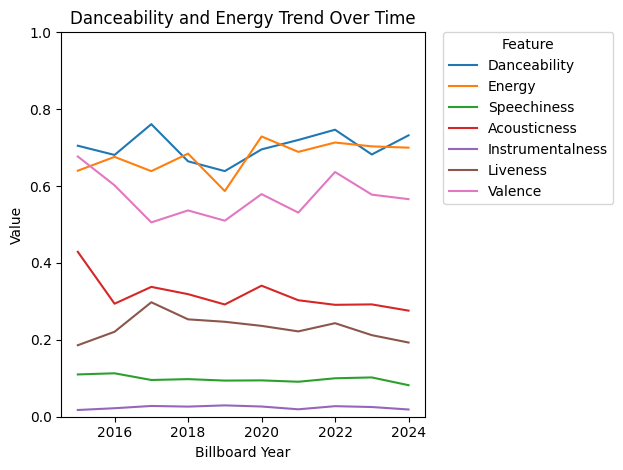

In [28]:
sns.lineplot(data=melted_df, x='Billboard Year', y='Value', hue='Feature',errorbar=None)

# Add title, limits, and show
plt.title('Danceability and Energy Trend Over Time')
plt.ylim(0, 1)
plt.legend(title='Feature')

# Move legend outside the plot
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Remove the "bubble" (legend frame)
# plt.legend(frameon=False)

# Adjust layout to fit the legend
plt.tight_layout()

plt.show()

In [14]:
dict_df[dict_df ["Typical Range"] == "0.0 to 1.0"]

,Feature,Meaning,Typical Range,Notes
0,Danceability,"How suitable a track is for dancing, based on ...",0.0 to 1.0,Higher = easier to dance to
1,Energy,Intensity and activity of a track. High energy...,0.0 to 1.0,"Higher = louder, faster, more intense"
5,Speechiness,Measure of spoken words in the track.,0.0 to 1.0,"Higher = more speech-like (e.g., rap)"
6,Acousticness,Confidence the track is acoustic.,0.0 to 1.0,Higher = more acoustic/natural
7,Instrumentalness,Predicts if track contains no vocals.,0.0 to 1.0,Higher = more instrumental
8,Liveness,Detects presence of an audience or live record...,0.0 to 1.0,Higher = more live feel
9,Valence,Musical positiveness conveyed by the track.,0.0 to 1.0,Higher = happier sounding
